In [10]:
import pandas as pd

csv_path = "ind_nifty200list.csv"

# Load the CSV file into the 'df' variable
df = pd.read_csv(csv_path)

# Corrected print statement for clarity
print("Loaded from:", csv_path)

# Inspect the DataFrame
print("Columns in CSV:", df.columns.tolist())
print(df.head())

Loaded from: ind_nifty200list.csv
Columns in CSV: ['Company Name', 'Industry', 'Symbol', 'Series', 'ISIN Code']
                 Company Name                Industry     Symbol Series  \
0            360 ONE WAM Ltd.      Financial Services     360ONE     EQ   
1              ABB India Ltd.           Capital Goods        ABB     EQ   
2                    ACC Ltd.  Construction Materials        ACC     EQ   
3       APL Apollo Tubes Ltd.           Capital Goods  APLAPOLLO     EQ   
4  AU Small Finance Bank Ltd.      Financial Services     AUBANK     EQ   

      ISIN Code  
0  INE466L01038  
1  INE117A01022  
2  INE012A01025  
3  INE702C01027  
4  INE949L01017  


In [11]:
import pandas as pd

# read your existing file
df = pd.read_csv("ind_nifty200list.csv")

# extract tickers and add .NS suffix for Yahoo Finance
tickers = df["Symbol"].astype(str).str.strip().unique()
tickers = [t + ".NS" for t in tickers]

# save cleaned ticker list
pd.DataFrame({"Ticker": tickers}).to_csv("ticker_list.csv", index=False)

print("✅ Total tickers:", len(tickers))
print("First 10 tickers:", tickers[:10])


✅ Total tickers: 201
First 10 tickers: ['360ONE.NS', 'ABB.NS', 'ACC.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS']


In [12]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import os

tickers = pd.read_csv("ticker_list.csv")["Ticker"].tolist()

end_date = datetime.today()
start_date = end_date - timedelta(days=365*2)

os.makedirs("price_data", exist_ok=True)

print(f"Downloading data from {start_date.date()} to {end_date.date()} for {len(tickers)} stocks...")

# Correct: don't index with ["Adj Close"], yfinance now returns adjusted prices by default
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# extract only Close if multiple levels exist
if isinstance(data.columns, pd.MultiIndex):
    data = data["Close"]

data.to_csv("price_data/all_prices.csv")

print("✅ Download complete! Saved to: price_data/all_prices.csv")
print("Shape of data:", data.shape)
print(data.head())


[**********************51%                       ]  102 of 201 completedHTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: DUMMYTATAM.NS"}}}
[*********************100%***********************]  201 of 201 completed

1 Failed download:
['DUMMYTATAM.NS']: YFTzMissingError('possibly delisted; no timezone found')


✅ Download complete! Saved to: price_data/all_prices.csv
Shape of data: (493, 201)
Ticker       360ONE.NS       ABB.NS  ABCAPITAL.NS       ACC.NS  ADANIENSOL.NS  \
Date                                                                            
2023-11-20  532.918823  4291.196777    171.149994  1815.917114     727.500000   
2023-11-21  537.160095  4289.518066    171.649994  1826.941040     731.799988   
2023-11-22  526.484131  4180.042480    170.949997  1802.807617     726.950012   
2023-11-23  526.776611  4205.856445    171.000000  1807.227051     723.049988   
2023-11-24  529.506592  4207.633789    168.699997  1808.021729     729.099976   

Ticker      ADANIENT.NS  ADANIGREEN.NS  ADANIPORTS.NS  ADANIPOWER.NS  \
Date                                                                   
2023-11-20  2147.885254     926.200012     796.292786      77.989998   
2023-11-21  2194.642334     926.599976     794.063171      78.500000   
2023-11-22  2170.664307     914.450012     784.699219      77

In [13]:
import pandas as pd

tickers = pd.read_csv("ticker_list.csv")["Ticker"].tolist()
print("Total tickers:", len(tickers))
print("First 10 tickers:", tickers[:10])


Total tickers: 201
First 10 tickers: ['360ONE.NS', 'ABB.NS', 'ACC.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS']


In [14]:
import pandas as pd
import numpy as np

# load data
data = pd.read_csv("price_data/all_prices.csv", index_col="Date", parse_dates=True)

print("Before cleaning:", data.shape)

# drop columns with too many missing values (>20%)
data = data.loc[:, data.isnull().mean() < 0.2]

# forward fill and backward fill for remaining NaNs
data = data.fillna(method="ffill").fillna(method="bfill")

print("After cleaning:", data.shape)

# compute daily log returns
log_returns = np.log(data / data.shift(1)).dropna()

# save log returns
log_returns.to_csv("price_data/log_returns.csv")

print("✅ Log returns computed and saved!")
print(log_returns.head())


Before cleaning: (493, 201)
After cleaning: (493, 189)


C:\Users\rashi\AppData\Local\Temp\ipykernel_7804\424733958.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill").fillna(method="bfill")


✅ Log returns computed and saved!
            360ONE.NS    ABB.NS  ABCAPITAL.NS    ACC.NS  ADANIENSOL.NS  \
Date                                                                     
2023-11-21   0.007927 -0.000391      0.002917  0.006052       0.005893   
2023-11-22  -0.020075 -0.025853     -0.004086 -0.013298      -0.006650   
2023-11-23   0.000555  0.006157      0.000292  0.002448      -0.005379   
2023-11-24   0.005169  0.000422     -0.013542  0.000440       0.008333   
2023-11-28   0.001472 -0.001667      0.008265  0.026292       0.171034   

            ADANIENT.NS  ADANIGREEN.NS  ADANIPORTS.NS  ADANIPOWER.NS  \
Date                                                                   
2023-11-21     0.021535       0.000432      -0.002804       0.006518   
2023-11-22    -0.010986      -0.013199      -0.011863      -0.013595   
2023-11-23     0.001196       0.017614       0.001514      -0.014306   
2023-11-24     0.022816       0.007706       0.003084       0.039805   
2023-11-28     

Best threshold (power-law based): 0.370
Nodes: 189
Edges: 28
Connected components: 166
✅ Power-law-based adjacency matrix saved to price_data/adjacency_matrix_powerlaw.csv


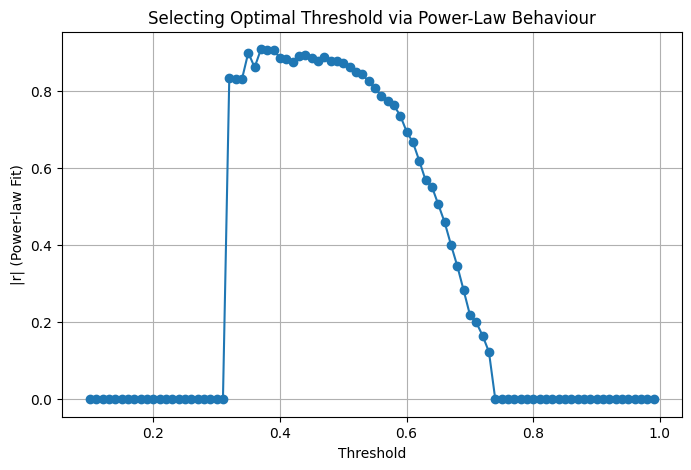

In [29]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Compute correlation-distance matrix
corr = log_returns.corr().values
corr_dist = np.sqrt((1 - corr) / 2)
np.fill_diagonal(corr_dist, 0)

# Step 2: Create adjacency matrix candidates for various thresholds
thresholds = np.arange(0.1, 1.0, 0.01)
edge_counts = []

for CP in thresholds:
    adj = (corr_dist <= CP).astype(int)
    np.fill_diagonal(adj, 0)
    G = nx.from_numpy_array(adj)
    edge_counts.append(G.number_of_edges())

# Step 3: Fit power-law to edge distribution to find region where it follows p(k) ~ k^-gamma
df_thresh = pd.DataFrame({'Threshold': thresholds, 'Edges': edge_counts})

# Step 4: Compute degree distribution for each network and check for power-law behaviour
powerlaw_scores = []
for CP in thresholds:
    adj = (corr_dist <= CP).astype(int)
    np.fill_diagonal(adj, 0)
    G = nx.from_numpy_array(adj)
    degrees = [d for n, d in G.degree() if d > 0]
    if len(degrees) > 10:
        # Estimate exponent gamma using linear regression on log-log scale
        x = np.log(np.arange(1, len(degrees)+1))
        y = np.log(sorted(degrees, reverse=True))
        slope, _, r_value, _, _ = stats.linregress(x, y)
        powerlaw_scores.append(abs(r_value))
    else:
        powerlaw_scores.append(0)

# Step 5: Pick threshold with best (highest |r|) fit to power law
best_idx = np.argmax(powerlaw_scores)
best_rho = thresholds[best_idx]

print(f"Best threshold (power-law based): {best_rho:.3f}")

# Step 6: Build final adjacency and graph
adj_matrix = (corr_dist <= best_rho).astype(int)
np.fill_diagonal(adj_matrix, 0)
G_opt = nx.from_numpy_array(adj_matrix)

print("Nodes:", G_opt.number_of_nodes())
print("Edges:", G_opt.number_of_edges())
print("Connected components:", nx.number_connected_components(G_opt))

# Save results
pd.DataFrame(adj_matrix).to_csv("price_data/adjacency_matrix_powerlaw.csv", index=False)
print("✅ Power-law-based adjacency matrix saved to price_data/adjacency_matrix_powerlaw.csv")

# Plot power-law fit scores
plt.figure(figsize=(8,5))
plt.plot(thresholds, powerlaw_scores, '-o')
plt.xlabel("Threshold")
plt.ylabel("|r| (Power-law Fit)")
plt.title("Selecting Optimal Threshold via Power-Law Behaviour")
plt.grid(True)
plt.show()


In [16]:
CP_star = 0.44
corr = log_returns.corr().values
corr_dist = np.sqrt((1 - corr) / 2)
np.fill_diagonal(corr_dist, 0)
adj_matrix = (corr_dist <= CP_star).astype(int)
np.fill_diagonal(adj_matrix, 0)
G_opt = nx.from_numpy_array(adj_matrix)

print("Optimal CP:", CP_star)
print("Nodes:", G_opt.number_of_nodes())
print("Edges:", G_opt.number_of_edges())
print("Connected components:", nx.number_connected_components(G_opt))


Optimal CP: 0.44
Nodes: 189
Edges: 146
Connected components: 132


In [17]:
import pandas as pd
import numpy as np

# load log returns
log_returns = pd.read_csv("price_data/log_returns.csv", index_col="Date")

# compute correlation matrix
corr_matrix = log_returns.corr()

# save correlation matrix
corr_matrix.to_csv("price_data/correlation_matrix.csv")

print("✅ Correlation matrix shape:", corr_matrix.shape)
print(corr_matrix.head())

# create adjacency matrix (thresholded)
threshold = 0.44  # you can adjust this value
adj_matrix = (corr_matrix.abs() > threshold).astype(int)

# remove self-loops
np.fill_diagonal(adj_matrix.values, 0)

# save adjacency matrix
adj_matrix.to_csv("price_data/adjacency_matrix.csv")

print("✅ Adjacency matrix created and saved!")
print(adj_matrix.head())


✅ Correlation matrix shape: (189, 189)
               360ONE.NS    ABB.NS  ABCAPITAL.NS    ACC.NS  ADANIENSOL.NS  \
360ONE.NS       1.000000  0.239553      0.281905  0.251153       0.145027   
ABB.NS          0.239553  1.000000      0.299505  0.411033       0.305108   
ABCAPITAL.NS    0.281905  0.299505      1.000000  0.464792       0.293376   
ACC.NS          0.251153  0.411033      0.464792  1.000000       0.547767   
ADANIENSOL.NS   0.145027  0.305108      0.293376  0.547767       1.000000   

               ADANIENT.NS  ADANIGREEN.NS  ADANIPORTS.NS  ADANIPOWER.NS  \
360ONE.NS         0.210003       0.188889       0.227868       0.191628   
ABB.NS            0.397573       0.302576       0.472435       0.273718   
ABCAPITAL.NS      0.420952       0.324351       0.458379       0.327681   
ACC.NS            0.688254       0.536289       0.710408       0.522651   
ADANIENSOL.NS     0.717071       0.800086       0.651806       0.669927   

               ALKEM.NS  ...  TVSMOTOR.NS  ULTR

✅ Graph created!
Number of nodes: 189
Number of edges: 1474


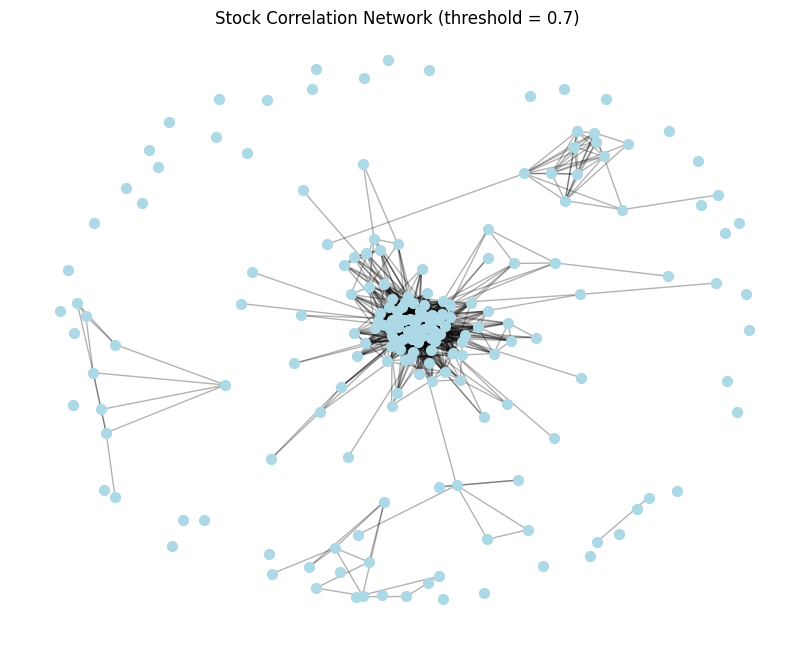

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# load adjacency matrix
adj_matrix = pd.read_csv("price_data/adjacency_matrix.csv", index_col=0)

# create undirected graph
G = nx.from_pandas_adjacency(adj_matrix)

print("✅ Graph created!")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# quick visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3, seed=42)  # layout
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightblue")
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Stock Correlation Network (threshold = 0.7)")
plt.axis("off")
plt.show()


In [19]:
import pandas as pd
import networkx as nx

# (re-use G from previous step)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# 1️⃣ Degree of each node
degree_dict = dict(G.degree())
degree_df = pd.DataFrame(list(degree_dict.items()), columns=["Stock", "Degree"])
degree_df = degree_df.sort_values(by="Degree", ascending=False)

print("\nTop 10 stocks by degree:")
print(degree_df.head(10))

# 2️⃣ Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print("\nAverage clustering coefficient:", round(avg_clustering, 3))

# 3️⃣ Network density
density = nx.density(G)
print("Network density:", round(density, 4))

# 4️⃣ Connected components
components = [len(c) for c in nx.connected_components(G)]
print("Number of connected components:", len(components))
print("Sizes of components:", components[:10])

# 5️⃣ Centrality (Degree & Betweenness)
deg_centrality = nx.degree_centrality(G)
btw_centrality = nx.betweenness_centrality(G)

central_df = pd.DataFrame({
    "Stock": list(deg_centrality.keys()),
    "DegreeCentrality": list(deg_centrality.values()),
    "BetweennessCentrality": list(btw_centrality.values())
}).sort_values(by="DegreeCentrality", ascending=False)

print("\nTop 10 central stocks:")
print(central_df.head(10))

# Save metrics
# degree_df.to_csv("network_analysis/degree_analysis.csv", index=False)
# central_df.to_csv("network_analysis/centrality_analysis.csv", index=False)


folder_name = "network analysis"

# Create the directory if it doesn't exist
# exist_ok=True prevents an error if the folder is already there
os.makedirs(folder_name, exist_ok=True)

# 3. Create platform-independent file paths using os.path.join
degree_file_path = os.path.join(folder_name, "degree_analysis.csv")
centrality_file_path = os.path.join(folder_name, "centrality_analysis.csv")

# Save metrics to the new folder
degree_df.to_csv(degree_file_path, index=False)
central_df.to_csv(centrality_file_path, index=False)

print(f"\nSuccessfully saved metrics to the '{folder_name}' folder:")
print(f"- {degree_file_path}")
print(f"- {centrality_file_path}")

Number of nodes: 189
Number of edges: 1474

Top 10 stocks by degree:
            Stock  Degree
169  TATAPOWER.NS      72
92       IRCTC.NS      68
150     RECLTD.NS      68
52         DLF.NS      68
105  LICHSGFIN.NS      66
38       CANBK.NS      64
31        BHEL.NS      63
140        PFC.NS      63
153       SAIL.NS      62
27         BEL.NS      60

Average clustering coefficient: 0.519
Network density: 0.083
Number of connected components: 52
Sizes of components: [1, 110, 1, 1, 1, 1, 7, 1, 1, 1]

Top 10 central stocks:
            Stock  DegreeCentrality  BetweennessCentrality
169  TATAPOWER.NS          0.382979               0.029633
92       IRCTC.NS          0.361702               0.013307
150     RECLTD.NS          0.361702               0.012873
52         DLF.NS          0.361702               0.061287
105  LICHSGFIN.NS          0.351064               0.013242
38       CANBK.NS          0.340426               0.007284
31        BHEL.NS          0.335106               0.00988

✅ Number of communities found: 55


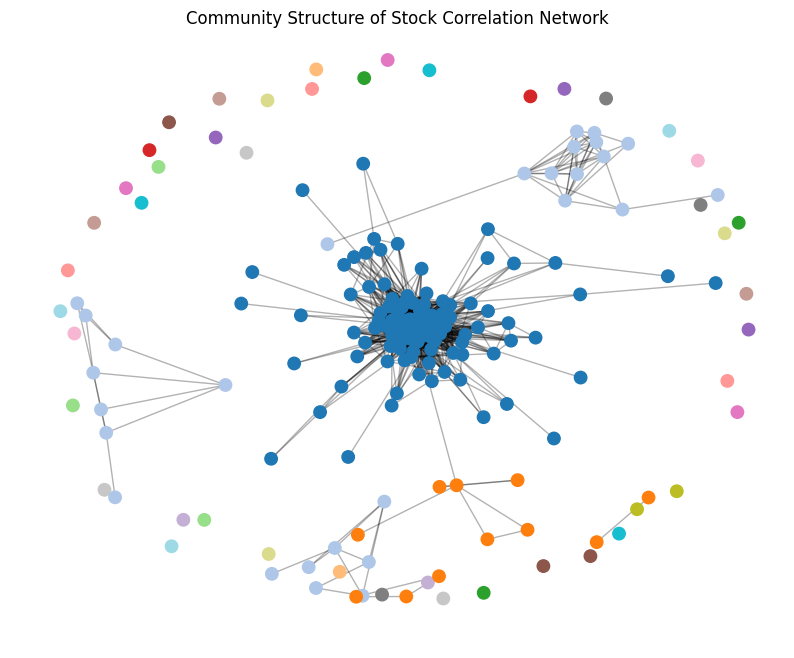

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# detect communities
communities = community.greedy_modularity_communities(G)

# assign community ID to each node
community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

print("✅ Number of communities found:", len(communities))

# visualize network with color-coded communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3, seed=42)
colors = [community_map[node] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=80, node_color=colors, cmap='tab20')
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Community Structure of Stock Correlation Network")
plt.axis("off")
plt.show()


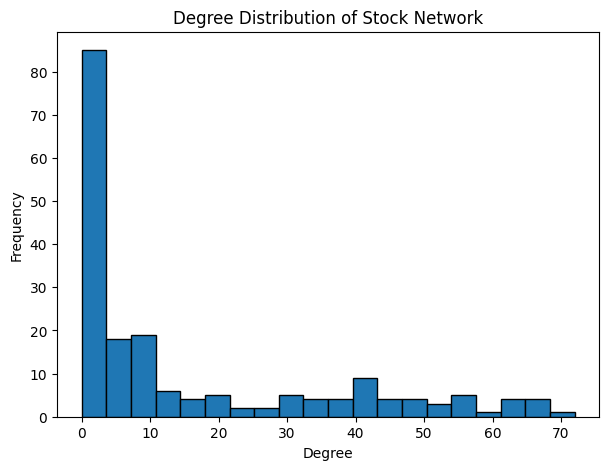

In [21]:
import matplotlib.pyplot as plt
import numpy as np

degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(7,5))
plt.hist(degrees, bins=20, edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Stock Network")
plt.show()


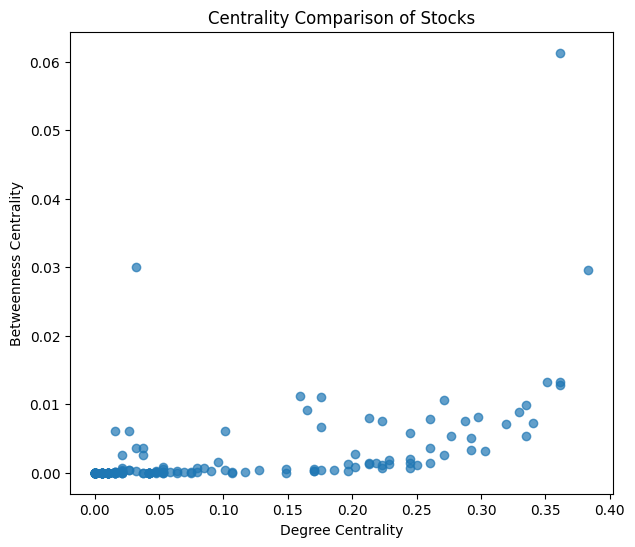

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

central_df = pd.read_csv("network analysis/centrality_analysis.csv")

plt.figure(figsize=(7,6))
plt.scatter(central_df["DegreeCentrality"], central_df["BetweennessCentrality"], alpha=0.7)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.title("Centrality Comparison of Stocks")
plt.show()


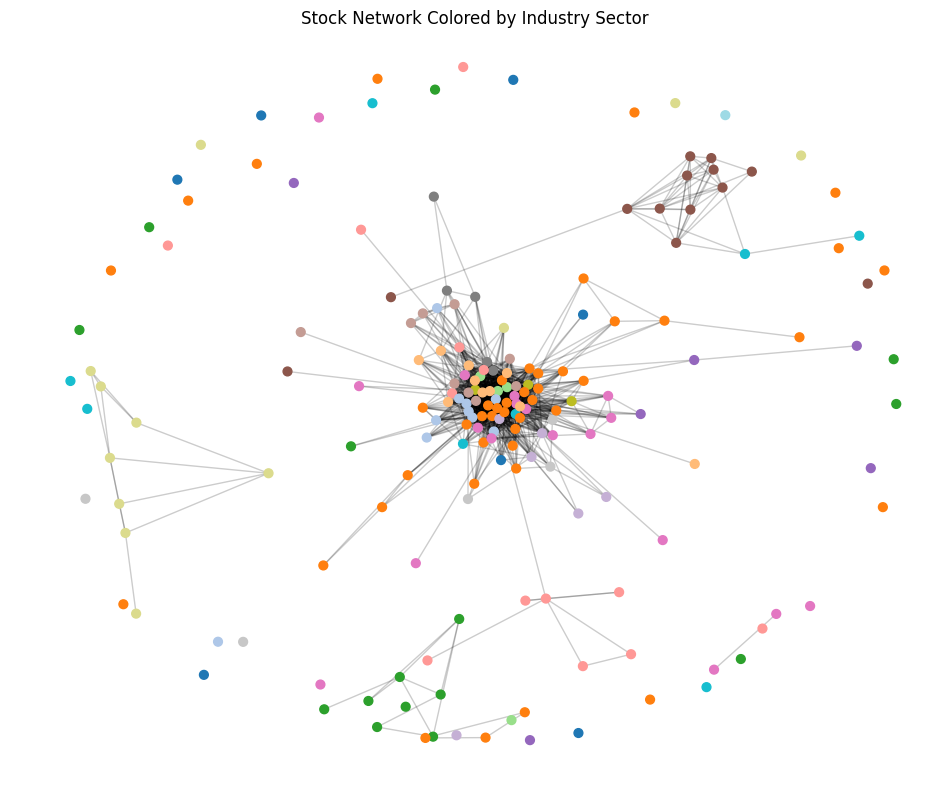

In [24]:
import matplotlib.pyplot as plt

# Load industry info from your Nifty 200 list
industry_map = pd.read_csv("ind_nifty200list.csv")[["Symbol", "Industry"]]
industry_map["Symbol"] = industry_map["Symbol"].astype(str).str.strip() + ".NS"
sector_dict = dict(zip(industry_map["Symbol"], industry_map["Industry"]))

# Map industries to colors
unique_sectors = list(set(sector_dict.values()))
color_map = {sector: i for i, sector in enumerate(unique_sectors)}
node_colors = [color_map.get(sector_dict.get(node, "Other"), 0) for node in G.nodes()]

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, k=0.3, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=40, node_color=node_colors, cmap='tab20')
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Stock Network Colored by Industry Sector")
plt.axis("off")
plt.show()


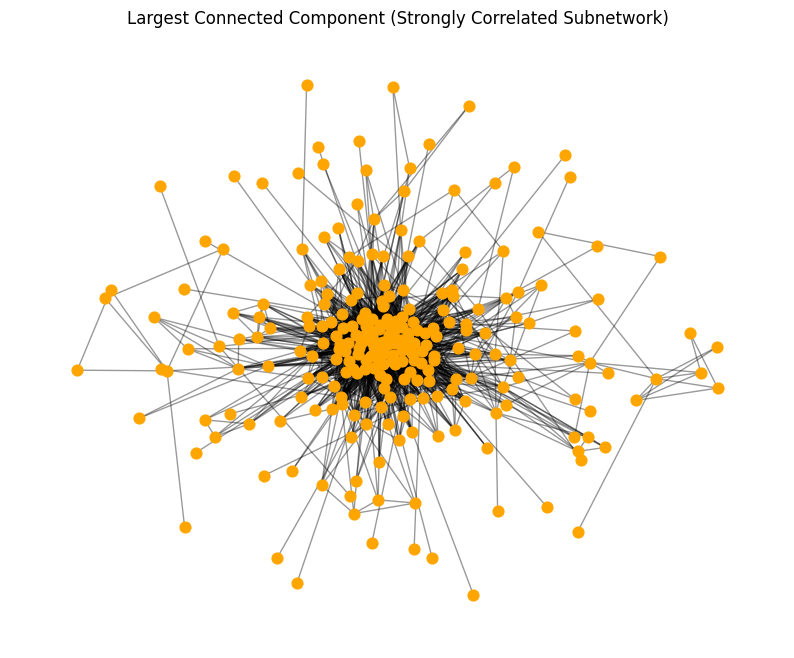

Nodes in largest component: 250
Edges in largest component: 3349


In [ ]:
largest_component = max(nx.connected_components(G), key=len)
H = G.subgraph(largest_component)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(H, k=0.3, seed=42)
nx.draw_networkx_nodes(H, pos, node_size=60, node_color="orange")
nx.draw_networkx_edges(H, pos, alpha=0.4)
plt.title("Largest Connected Component (Strongly Correlated Subnetwork)")
plt.axis("off")
plt.show()

print("Nodes in largest component:", len(H.nodes()))
print("Edges in largest component:", len(H.edges()))


In [25]:
import pandas as pd
metrics_summary = {
    "Nodes": G.number_of_nodes(),
    "Edges": G.number_of_edges(),
    "Density": nx.density(G),
    "Avg Clustering": nx.average_clustering(G),
    "Connected Components": nx.number_connected_components(G),
    "Avg Degree": sum(dict(G.degree()).values())/G.number_of_nodes()
}

summary_df = pd.DataFrame([metrics_summary])
print(summary_df.T)
summary_df.to_csv("price_data/network_summary.csv", index=False)


                                0
Nodes                  189.000000
Edges                 1474.000000
Density                  0.082967
Avg Clustering           0.519384
Connected Components    52.000000
Avg Degree              15.597884


In [26]:
# weighted graph using absolute correlations
weighted_G = nx.from_pandas_adjacency(corr_matrix.abs())
weights = [weighted_G[u][v]['weight'] for u, v in weighted_G.edges()]
print("Total edges (weighted):", len(weights))


Total edges (weighted): 17955


Best threshold (power-law based): 0.440
Nodes: 461
Edges: 212
Connected components: 373
✅ Power-law-based adjacency matrix saved to price_data/adjacency_matrix_powerlaw.csv


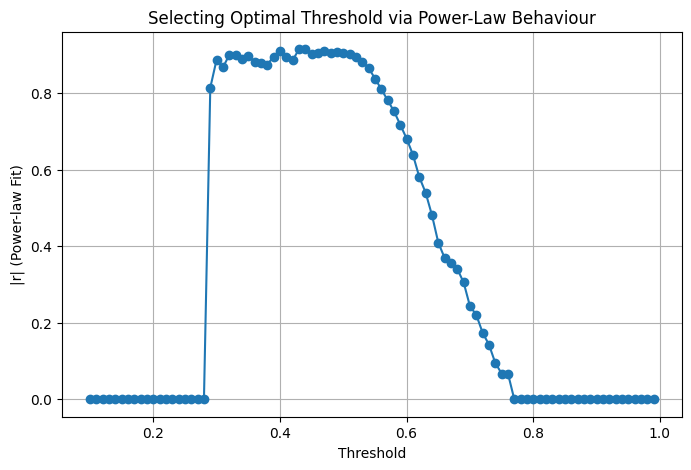

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Compute correlation-distance matrix
corr = log_returns.corr().values
corr_dist = np.sqrt((1 - corr) / 2)
np.fill_diagonal(corr_dist, 0)

# Step 2: Create adjacency matrix candidates for various thresholds
thresholds = np.arange(0.1, 1.0, 0.01)
edge_counts = []

for CP in thresholds:
    adj = (corr_dist <= CP).astype(int)
    np.fill_diagonal(adj, 0)
    G = nx.from_numpy_array(adj)
    edge_counts.append(G.number_of_edges())

# Step 3: Fit power-law to edge distribution to find region where it follows p(k) ~ k^-gamma
df_thresh = pd.DataFrame({'Threshold': thresholds, 'Edges': edge_counts})

# Step 4: Compute degree distribution for each network and check for power-law behaviour
powerlaw_scores = []
for CP in thresholds:
    adj = (corr_dist <= CP).astype(int)
    np.fill_diagonal(adj, 0)
    G = nx.from_numpy_array(adj)
    degrees = [d for n, d in G.degree() if d > 0]
    if len(degrees) > 10:
        # Estimate exponent gamma using linear regression on log-log scale
        x = np.log(np.arange(1, len(degrees)+1))
        y = np.log(sorted(degrees, reverse=True))
        slope, _, r_value, _, _ = stats.linregress(x, y)
        powerlaw_scores.append(abs(r_value))
    else:
        powerlaw_scores.append(0)

# Step 5: Pick threshold with best (highest |r|) fit to power law
best_idx = np.argmax(powerlaw_scores)
best_rho = thresholds[best_idx]

print(f"Best threshold (power-law based): {best_rho:.3f}")

# Step 6: Build final adjacency and graph
adj_matrix = (corr_dist <= best_rho).astype(int)
np.fill_diagonal(adj_matrix, 0)
G_opt = nx.from_numpy_array(adj_matrix)

print("Nodes:", G_opt.number_of_nodes())
print("Edges:", G_opt.number_of_edges())
print("Connected components:", nx.number_connected_components(G_opt))

# Save results
pd.DataFrame(adj_matrix).to_csv("price_data/adjacency_matrix_powerlaw.csv", index=False)
print("✅ Power-law-based adjacency matrix saved to price_data/adjacency_matrix_powerlaw.csv")

# Plot power-law fit scores
plt.figure(figsize=(8,5))
plt.plot(thresholds, powerlaw_scores, '-o')
plt.xlabel("Threshold")
plt.ylabel("|r| (Power-law Fit)")
plt.title("Selecting Optimal Threshold via Power-Law Behaviour")
plt.grid(True)
plt.show()


In [36]:
import pandas as pd
corr = pd.DataFrame(corr)

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]   # or whatever thresholds you used
results = []

for t in thresholds:
    # Graph at threshold t
    edges = [(i, j) for i in corr.columns for j in corr.columns 
             if i < j and abs(corr.loc[i, j]) >= t]

    G_t = nx.Graph()
    G_t.add_nodes_from(corr.columns)
    G_t.add_edges_from(edges)

    density = nx.density(G_t)
    clustering = nx.average_clustering(G_t)
    components = nx.number_connected_components(G_t)

    results.append([t, density, clustering, components])

df_results = pd.DataFrame(results, columns=["Threshold", "Density", "Clustering", "Components"])
df_results


,Threshold,Density,Clustering,Components
0,0.2,0.670156,0.845453,1
1,0.3,0.312957,0.748967,6
2,0.4,0.124676,0.615020,38
3,0.5,0.042159,0.365234,83
4,0.6,0.009850,0.205935,128
5,0.7,0.002195,0.062610,160
6,0.8,0.000450,0.015873,182
7,0.9,0.000056,0.000000,188


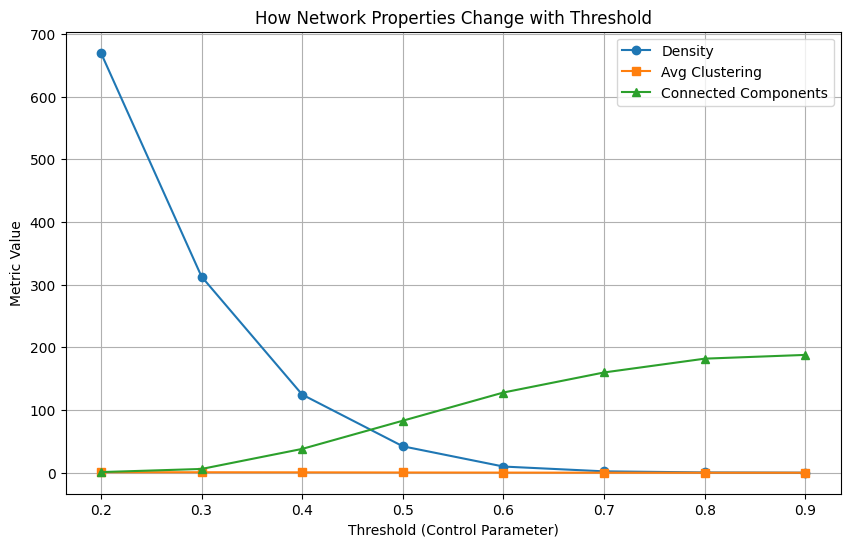

In [37]:
plt.figure(figsize=(10,6))
plt.plot(df_results["Threshold"], df_results["Density"]*1000, marker='o', label="Density")
plt.plot(df_results["Threshold"], df_results["Clustering"], marker='s', label="Avg Clustering")
plt.plot(df_results["Threshold"], df_results["Components"], marker='^', label="Connected Components")
plt.xlabel("Threshold (Control Parameter)")
plt.ylabel("Metric Value")
plt.title("How Network Properties Change with Threshold")
plt.legend()
plt.grid(True)
plt.show()
